# Exploratory Data Analysis of New York Schools


PASSNYC uses public data to identify students within New York City’s under-performing school districts and, 
through consulting and collaboration with partners, aims to increase the diversity of students taking the
Specialized High School Admissions Test (SHSAT). By focusing efforts in under-performing areas that are 
historically underrepresented in SHSAT registration, we will help pave the path to specialized high schools 
for a more diverse group of students.

In [127]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

import  plotly.plotly  as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

%matplotlib inline

%pwd


'C:\\Users\\manju\\Desktop\\Springboard\\Capstone1'

In [128]:
pd.set_option('display.max_columns', None)  
#school = pd.read_csv('2016 School Explorer.csv')
#safety = pd.read_csv('../input/eport/2010-2016-school-safety-report.csv')
schools = pd.read_csv('2013_-_2018_Demographic_Snapshot_School.csv')
shsat_1718 = pd.read_csv('2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1617 = pd.read_csv('2016-2017_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1516 = pd.read_csv('2015-2016_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')

In [129]:
schools.head()


,DBN,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,23,0,0,0,0,0,0,0,93,48.9%,97,51.1%,9,4.7%,72,37.9%,104,54.7%,2,1.1%,3,1.6%,65,34.2%,19,10%,171,90%,No Data
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,24,0,0,0,0,0,0,0,84,45.9%,99,54.1%,8,4.4%,65,35.5%,107,58.5%,1,0.5%,2,1.1%,64,35%,17,9.3%,169,92.3%,93.5%
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,47.2%,93,52.8%,9,5.1%,57,32.4%,105,59.7%,3,1.7%,2,1.1%,60,34.1%,16,9.1%,149,84.7%,89.6%
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,46.6%,95,53.4%,14,7.9%,51,28.7%,105,59%,4,2.2%,4,2.2%,51,28.7%,12,6.7%,152,85.4%,89.2%
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,52.1%,91,47.9%,20,10.5%,52,27.4%,110,57.9%,2,1.1%,6,3.2%,45,23.7%,8,4.2%,161,84.7%,89.0%


In [130]:
schools.shape


(8972, 39)

In [131]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8972 entries, 0 to 8971
Data columns (total 39 columns):
DBN                                           8972 non-null object
School Name                                   8972 non-null object
Year                                          8972 non-null object
Total Enrollment                              8972 non-null int64
Grade PK (Half Day & Full Day)                8972 non-null int64
Grade K                                       8972 non-null int64
Grade 1                                       8972 non-null int64
Grade 2                                       8972 non-null int64
Grade 3                                       8972 non-null int64
Grade 4                                       8972 non-null int64
Grade 5                                       8972 non-null int64
Grade 6                                       8972 non-null int64
Grade 7                                       8972 non-null int64
Grade 8                         

In [132]:
schools.describe()

,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,# Male,# Asian,# Black,# Hispanic,# Multiple Race Categories Not Represented,# White,# Students with Disabilities,# English Language Learners,# Poverty
count,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000
mean,598.226148,15.635533,46.608671,48.398128,47.649131,46.430227,45.044026,43.910945,42.599643,41.859563,41.536781,50.853879,49.713553,39.446946,38.539122,290.397793,307.820218,94.344182,161.841953,242.073005,12.493981,87.473027,117.765047,81.541016,435.558627
std,485.684603,36.119885,54.561859,57.195199,57.255600,57.788614,57.712646,56.348207,87.889778,89.773353,91.209942,135.137015,151.644252,108.051316,105.211557,242.665721,257.627423,217.781445,172.300146,235.650938,19.403410,186.636443,94.887663,114.532540,346.397968
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,162.000000,5.000000,44.000000,84.000000,3.000000,5.000000,62.000000,17.000000,229.000000
50%,484.000000,0.000000,34.000000,35.000000,31.500000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,251.000000,16.000000,111.000000,175.000000,7.000000,14.000000,95.000000,42.000000,356.000000
75%,704.000000,31.000000,83.000000,86.000000,86.000000,84.000000,81.000000,80.000000,63.000000,60.000000,58.000000,69.000000,70.000000,52.000000,48.000000,353.000000,369.000000,74.000000,208.000000,312.000000,14.000000,76.000000,144.000000,99.000000,528.000000
max,5838.000000,1158.000000,406.000000,383.000000,349.000000,373.000000,376.000000,351.000000,771.000000,796.000000,839.000000,1551.000000,3832.000000,1450.000000,1380.000000,2360.000000,3478.000000,3576.000000,1481.000000,2005.000000,293.000000,3230.000000,925.000000,1219.000000,3589.000000


In [133]:
shsat_1516["Year"] = '2015-16'
shsat_1516.loc[shsat_1516["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1516.loc[shsat_1516["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1516.loc[shsat_1516["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"


shsat_1516["Offered_ratio"] = (shsat_1516["Count of Offers"].astype(float) / shsat_1516["Count of Students in HS Admissions"].astype(float))*100
shsat_1516["Offered_ratio"] = shsat_1516["Offered_ratio"].round(2)

shsat_1617["Year"] = '2016-17'
shsat_1617.loc[shsat_1617["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1617.loc[shsat_1617["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1617.loc[shsat_1617["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1617["Offered_ratio"] = (shsat_1617["Count of Offers"].astype(float) / shsat_1617["Count of Students in HS Admissions"].astype(float))*100
shsat_1617["Offered_ratio"] = shsat_1617["Offered_ratio"].round(2)

shsat_1718["Year"] = '2017-18'
shsat_1718.loc[shsat_1718["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1718.loc[shsat_1718["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1718.loc[shsat_1718["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1718["Offered_ratio"] = (shsat_1718["Count of Offers"].astype(float) / shsat_1617["Count of Students in HS Admissions"].astype(float))*100
shsat_1718["Offered_ratio"] = shsat_1718["Offered_ratio"].round(2)


shsat = [shsat_1516, shsat_1617, shsat_1718]
shsat_df = pd.concat(shsat)


shsat_df.loc[shsat_df["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_df.loc[shsat_df["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_df.loc[shsat_df["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"

shsat_df["Offered_ratio"] = (shsat_df["Count of Offers"].astype(float) / shsat_df["Count of Students in HS Admissions"].astype(float))*100
shsat_df["Offered_ratio"] = shsat_df["Offered_ratio"].round(2)
shsat_df

,Feeder School DBN,Feeder School Name,Count of Students in HS Admissions,Count of Testers,Count of Offers,Year,Offered_ratio
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,8,8,0,2015-16,0.00
1,01M140,P.S. 140 NATHAN STRAUS,14,14,0,2015-16,0.00
2,01M184,P.S. 184M SHUANG WEN,39,39,19,2015-16,48.72
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,0,2015-16,NaN
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",6,6,0,2015-16,0.00
5,01M332,UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL,0,0,0,2015-16,NaN
6,01M378,SCHOOL FOR GLOBAL LEADERS,14,14,0,2015-16,0.00
7,01M450,EAST SIDE COMMUNITY SCHOOL,16,16,0,2015-16,0.00
8,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",114,114,81,2015-16,71.05
9,01M839,TOMPKINS SQUARE MIDDLE SCHOOL,39,39,6,2015-16,15.38


In [134]:
shsat_1718.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 7 columns):
Feeder School DBN                     594 non-null object
Feeder School Name                    594 non-null object
Count of Students in HS Admissions    594 non-null object
Count of Testers                      594 non-null object
Count of Offers                       594 non-null object
Year                                  594 non-null object
Offered_ratio                         576 non-null float64
dtypes: float64(1), object(6)
memory usage: 32.6+ KB


#Select Schools that have upto Grade 8

In [135]:
schools_df  = schools.loc[schools['Grade 8'] != 0]

In [136]:
schools_df

,DBN,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
15,01M034,P.S. 034 Franklin D. Roosevelt,2013-14,393,18,33,32,35,34,45,43,43,57,53,0,0,0,0,196,49.9%,197,50.1%,26,6.6%,108,27.5%,246,62.6%,1,0.3%,12,3.1%,129,32.8%,25,6.4%,373,94.9%,No Data
16,01M034,P.S. 034 Franklin D. Roosevelt,2014-15,395,18,40,32,29,35,32,44,63,43,59,0,0,0,0,199,50.4%,196,49.6%,25,6.3%,110,27.8%,245,62%,1,0.3%,14,3.5%,119,30.1%,26,6.6%,381,96.5%,86.0%
17,01M034,P.S. 034 Franklin D. Roosevelt,2015-16,394,18,33,41,30,27,36,33,64,62,50,0,0,0,0,200,50.8%,194,49.2%,18,4.6%,113,28.7%,249,63.2%,0,0%,14,3.6%,122,31%,29,7.4%,384,97.5%,86.1%
18,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,21,24,37,31,29,36,38,59,62,0,0,0,0,170,48.6%,180,51.4%,19,5.4%,102,29.1%,216,61.7%,2,0.6%,11,3.1%,130,37.1%,27,7.7%,348,99.4%,86.8%
19,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,13,25,18,22,47,35,36,38,41,58,0,0,0,0,150,45%,183,55%,11,3.3%,106,31.8%,204,61.3%,3,0.9%,9,2.7%,122,36.6%,25,7.5%,325,97.6%,93.9%
40,01M140,P.S. 140 Nathan Straus,2013-14,393,12,30,31,31,34,34,28,61,63,69,0,0,0,0,194,49.4%,199,50.6%,22,5.6%,50,12.7%,310,78.9%,1,0.3%,10,2.5%,137,34.9%,55,14%,314,79.9%,No Data
41,01M140,P.S. 140 Nathan Straus,2014-15,380,18,26,29,27,35,32,34,53,65,61,0,0,0,0,198,52.1%,182,47.9%,21,5.5%,40,10.5%,302,79.5%,2,0.5%,15,3.9%,134,35.3%,65,17.1%,290,76.3%,84.8%
42,01M140,P.S. 140 Nathan Straus,2015-16,376,13,26,25,29,30,34,29,69,49,72,0,0,0,0,188,50%,188,50%,20,5.3%,47,12.5%,292,77.7%,4,1.1%,13,3.5%,132,35.1%,54,14.4%,296,78.7%,86.1%
43,01M140,P.S. 140 Nathan Straus,2016-17,382,18,31,28,25,28,32,34,64,66,56,0,0,0,0,182,47.6%,200,52.4%,18,4.7%,45,11.8%,304,79.6%,4,1%,11,2.9%,124,32.5%,45,11.8%,287,75.1%,84.3%
44,01M140,P.S. 140 Nathan Straus,2017-18,371,18,28,29,24,24,28,29,60,65,66,0,0,0,0,182,49.1%,189,50.9%,21,5.7%,46,12.4%,292,78.7%,2,0.5%,10,2.7%,115,31%,36,9.7%,324,87.3%,90.6%


In [138]:
type(schools_df)

pandas.core.frame.DataFrame

In [139]:
schools_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3032 entries, 15 to 8961
Data columns (total 39 columns):
DBN                                           3032 non-null object
School Name                                   3032 non-null object
Year                                          3032 non-null object
Total Enrollment                              3032 non-null int64
Grade PK (Half Day & Full Day)                3032 non-null int64
Grade K                                       3032 non-null int64
Grade 1                                       3032 non-null int64
Grade 2                                       3032 non-null int64
Grade 3                                       3032 non-null int64
Grade 4                                       3032 non-null int64
Grade 5                                       3032 non-null int64
Grade 6                                       3032 non-null int64
Grade 7                                       3032 non-null int64
Grade 8                        

## Preparing the Data

In [142]:
def stripsoff(x):
    return float(x.strip('%'))


schools_df.loc[schools_df["Economic Need Index"] == 'No Data', "Economic Need Index"] = '0'
schools_df["Economic Need Index"] = schools_df["Economic Need Index"].astype(str).apply(stripsoff)
schools_df.loc[schools_df["Economic Need Index"] == 0, "Economic Need Index"] = schools_df["Economic Need Index"].mean()
#schools_df["Economic Need Index"] = schools_df["Economic Need Index"].fillna(schools_df["Economic Need Index"].mean())

schools_df["% Asian"] = schools_df["% Asian"].astype(str).apply(stripsoff)
schools_df["% Black"] = schools_df["% Black"].astype(str).apply(stripsoff)
schools_df["% Hispanic"] = schools_df["% Hispanic"].astype(str).apply(stripsoff)
schools_df["% White"] = schools_df["% White"].astype(str).apply(stripsoff)
schools_df["% English Language Learners"] = schools_df["% English Language Learners"].astype(str).apply(stripsoff)
schools_df["% Poverty"] = schools_df["% Poverty"].astype(str).apply(stripsoff)


schools_df["% Black + Hispanic"] = schools_df["% Black"] + schools_df["% Hispanic"]
schools_df["Bl+Hi_Grade8"] = (schools_df["% Black + Hispanic"] * schools_df["Grade 8"]) / 100
schools_df["Bl+Hi_Grade8"] = schools_df["Bl+Hi_Grade8"].round()

schools_df ["% Asian + White"] = schools_df["% Asian"] + schools_df["% White"]
schools_df["As+Wh_Grade8"] = (schools_df ["% Asian + White"] * schools_df["Grade 8"]) / 100
schools_df["As+Wh_Grade8"] = schools_df["As+Wh_Grade8"].round()


schools_df["% Others"] = (schools_df["% Black"] + schools_df["% Hispanic"] + schools_df["% White"] + schools_df["% Asian"]).sub(100).mul(-1)




C:\Users\manju\Anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



TypeError: invalid type comparison

In [141]:
shsat_df = pd.merge(shsat_df, 
                  schools_df,
                  left_on= ['Feeder School DBN', 'Year'],
                  right_on=['DBN', 'Year'],
                  how='left')
shsat_df

shsat_1516 = pd.merge(shsat_1516, 
                  schools_df,
                  left_on= ['Feeder School DBN', 'Year'],
                  right_on=['DBN', 'Year'],
                  how='left')

shsat_1617 = pd.merge(shsat_1617, 
                  schools_df,
                  left_on= ['Feeder School DBN', 'Year'],
                  right_on=['DBN', 'Year'],
                  how='left')

shsat_1718 = pd.merge(shsat_1718, 
                  schools_df,
                  left_on= ['Feeder School DBN', 'Year'],
                  right_on=['DBN', 'Year'],
                  how='left')
shsat_1516 

,Feeder School DBN,Feeder School Name,Count of Students in HS Admissions,Count of Testers,Count of Offers,Year,Offered_ratio,DBN,School Name,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,8,8,0,2015-16,0.00,01M034,P.S. 034 Franklin D. Roosevelt,394.0,18.0,33.0,41.0,30.0,27.0,36.0,33.0,64.0,62.0,50.0,0.0,0.0,0.0,0.0,200.0,50.8%,194.0,49.2%,18.0,4.6,113.0,28.7,249.0,63.2,0.0,0%,14.0,3.6,122.0,31%,29.0,7.4,384.0,97.5,86.1,91.9,46.0,8.2,4.0,-0.1
1,01M140,P.S. 140 NATHAN STRAUS,14,14,0,2015-16,0.00,01M140,P.S. 140 Nathan Straus,376.0,13.0,26.0,25.0,29.0,30.0,34.0,29.0,69.0,49.0,72.0,0.0,0.0,0.0,0.0,188.0,50%,188.0,50%,20.0,5.3,47.0,12.5,292.0,77.7,4.0,1.1%,13.0,3.5,132.0,35.1%,54.0,14.4,296.0,78.7,86.1,90.2,65.0,8.8,6.0,1.0
2,01M184,P.S. 184M SHUANG WEN,39,39,19,2015-16,48.72,01M184,P.S. 184m Shuang Wen,663.0,36.0,63.0,73.0,77.0,61.0,63.0,77.0,84.0,78.0,51.0,0.0,0.0,0.0,0.0,331.0,49.9%,332.0,50.1%,471.0,71.0,24.0,3.6,77.0,11.6,34.0,5.1%,57.0,8.6,121.0,18.3%,115.0,17.3,468.0,70.6,54.9,15.2,8.0,79.6,41.0,5.2
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,0,2015-16,NaN,01M188,P.S. 188 The Island School,489.0,31.0,47.0,48.0,50.0,43.0,43.0,54.0,52.0,60.0,61.0,0.0,0.0,0.0,0.0,216.0,44.2%,273.0,55.8%,9.0,1.8,145.0,29.7,312.0,63.8,2.0,0.4%,21.0,4.3,146.0,29.9%,77.0,15.7,424.0,86.7,92.4,93.5,57.0,6.1,4.0,0.4
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",6,6,0,2015-16,0.00,01M301,"Technology, Arts, and Sciences Studio",156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,54.0,56.0,0.0,0.0,0.0,0.0,76.0,48.7%,80.0,51.3%,12.0,7.7,45.0,28.8,86.0,55.1,6.0,3.8%,7.0,4.5,60.0,38.5%,10.0,6.4,127.0,81.4,77.6,83.9,47.0,12.2,7.0,3.9
5,01M332,UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL,0,0,0,2015-16,NaN,01M332,University Neighborhood Middle School,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,35.0,36.0,0.0,0.0,0.0,0.0,49.0,44.5%,61.0,55.5%,6.0,5.5,30.0,27.3,69.0,62.7,1.0,0.9%,4.0,3.6,43.0,39.1%,16.0,14.5,96.0,87.3,73.1,90.0,32.0,9.1,3.0,0.9
6,01M378,SCHOOL FOR GLOBAL LEADERS,14,14,0,2015-16,0.00,01M378,School for Global Leaders,264.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,84.0,80.0,0.0,0.0,0.0,0.0,117.0,44.3%,147.0,55.7%,40.0,15.2,59.0,22.3,154.0,58.3,6.0,2.3%,5.0,1.9,88.0,33.3%,20.0,7.6,183.0,69.3,76.8,80.6,64.0,17.1,14.0,2.3
7,01M450,EAST SIDE COMMUNITY SCHOOL,16,16,0,2015-16,0.00,01M450,East Side Community School,677.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,103.0,93.0,103.0,96.0,97.0,90.0,334.0,49.3%,343.0,50.7%,73.0,10.8,139.0,20.5,361.0,53.3,23.0,3.4%,81.0,12.0,191.0,28.2%,6.0,0.9,471.0,69.6,59.2,73.8,69.0,22.8,21.0,3.4
8,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",114,114,81,2015-16,71.05,01M539,"New Explorations into Science, Technology and ...",1753.0,0.0,123.0,111.0,113.0,115.0,117.0,116.0,144.0,122.0,137.0,143.0,139.0,185.0,188.0,885.0,50.5%,868.0,49.5%,579.0,33.0,153.0,8.7,198.0,11.3,91.0,5.2%,732.0,41.8,82.0,4.7%,7.0,0.4,478.0,27.3,25.5,20.0,27.0,74.8,102.0,5.2
9,01M839,TOMPKINS SQUARE MIDDLE SCHOOL,39,39,6,2015-16,15.38,01M839,Tompkins Square Middle School,371.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,124.0,120.0,0.0,0.0,0.0,0.0,195.0,52.6%,176.0,47.4%,87.0,23.5,59.0,15.9,138.0,37.2,12.0,3.2%,75.0,20.2,90.0,24.3%,11.0,3.0,257.0,69.3,59.4,53.1,64.0,43.7,52.0,3.2


# Economic Need Index

## Economic  Need Index Distribution


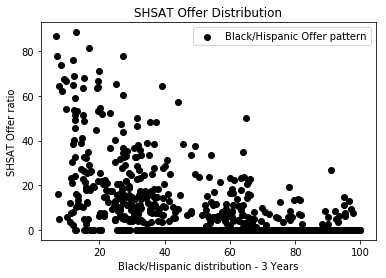

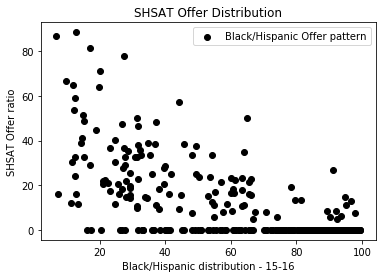

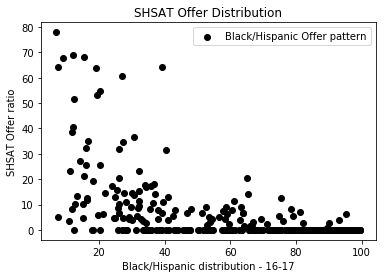

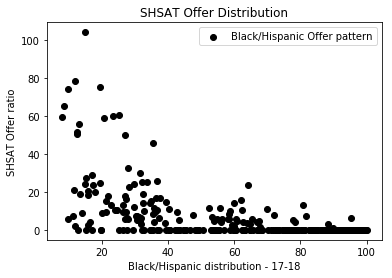

In [144]:
#figure = ff.create_distplot([schools["Economic Need Index"]],['ENI'],bin_size=0.01)
#iplot(figure, filename='ENI distplot')


plt.scatter(shsat_df["% Black + Hispanic"],shsat_df["Offered_ratio"], label = 'Black/Hispanic Offer pattern', color ='k')
plt.xlabel('Black/Hispanic distribution - 3 Years')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()


plt.scatter(shsat_1516["% Black + Hispanic"],shsat_1516["Offered_ratio"], label = 'Black/Hispanic Offer pattern', color ='k')
plt.xlabel('Black/Hispanic distribution - 15-16')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1617["% Black + Hispanic"],shsat_1617["Offered_ratio"], label = 'Black/Hispanic Offer pattern', color ='k')
plt.xlabel('Black/Hispanic distribution - 16-17')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1718["% Black + Hispanic"],shsat_1718["Offered_ratio"], label = 'Black/Hispanic Offer pattern', color ='k')
plt.xlabel('Black/Hispanic distribution - 17-18')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()




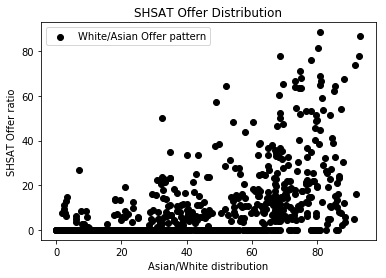

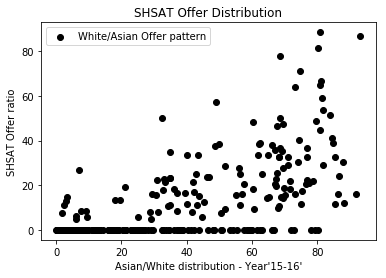

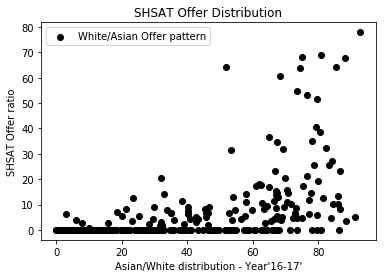

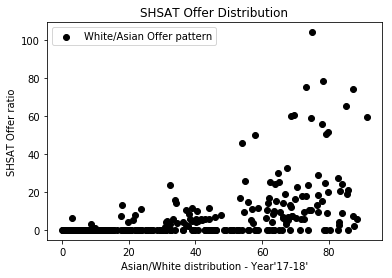

In [145]:
plt.scatter(shsat_df["% Asian + White"],shsat_df["Offered_ratio"], label = 'White/Asian Offer pattern', color ='k')
plt.xlabel('Asian/White distribution')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1516["% Asian + White"],shsat_1516["Offered_ratio"], label = 'White/Asian Offer pattern', color ='k')
plt.xlabel("Asian/White distribution - Year'15-16'")
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1617["% Asian + White"],shsat_1617["Offered_ratio"], label = 'White/Asian Offer pattern', color ='k')
plt.xlabel("Asian/White distribution - Year'16-17'")
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1718["% Asian + White"],shsat_1718["Offered_ratio"], label = 'White/Asian Offer pattern', color ='k')
plt.xlabel("Asian/White distribution - Year'17-18'")
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()